In [216]:
import pandas as pd
import numpy as np
'г. Севастополь'
'Республика Крым'
from scipy.stats import shapiro

In [217]:
xl = pd.ExcelFile('final data.xlsx')
xl.sheet_names  # see all sheet names

['heart',
 'cancer',
 'breath',
 'environm_real',
 'grp_pc_real',
 'grp_real',
 'emissions',
 'pop',
 'unemp',
 'doct10k',
 'gini',
 'roads',
 'electr',
 'workers',
 'lab_force']

In [218]:

total_data = pd.DataFrame()
keys = xl.sheet_names
wrong_dfs = []
dict_dfs = {}
for sheet in range(len(xl.sheet_names)):
    data = pd.read_excel('final data.xlsx',sheet_name = xl.sheet_names[sheet])
    try:
        data = pd.melt(data,id_vars=  'region')
        data = data[(data['variable']>= 2004) & (data['variable']<= 2019)  ]
        
        data = data[(data['region'] != 'г. Севастополь') & 
                    (data['region'] != 'Республика Крым')&
                    (data['region'] != 'Чеченская Республика')]
        ###############
        #if sheet == 'heart' or sheet =='breath' or sheet == 'cancer':
            #data['value'] = data['value'].shift(-1).astype(float)
       # else:
        data['value'] = data['value'].astype(float)
            
        total_data['region'] = data['region'].values
        total_data['year'] = data['variable'].values
        total_data[keys[sheet]]= data['value'].values

            
    except:
        print(keys[sheet])
        wrong_dfs.append(data)
    print(len(data) , keys[sheet])
    
    dict_dfs[keys[sheet]] = data

1264 heart
1264 cancer
1264 breath
1264 environm_real
1264 grp_pc_real
1264 grp_real
1264 emissions
1264 pop
1264 unemp
1264 doct10k
1264 gini
1264 roads
1264 electr
1264 workers
1264 lab_force


In [219]:
total_data1 = total_data.copy()
#total_data1 = total_data1.drop(columns = ['grp_real'])
total_data1['environm_real_pc'] = total_data1['environm_real']/total_data1['pop']
total_data1['emissions_pc'] = total_data1['emissions']/total_data1['pop']
total_data1['electr_pc'] = total_data1['electr']/total_data1['pop']

total_data1 = total_data1.drop(columns = ['environm_real', 'emissions','electr'])



In [220]:
total_data1.columns.values

array(['region', 'year', 'heart', 'cancer', 'breath', 'grp_pc_real',
       'grp_real', 'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers',
       'lab_force', 'environm_real_pc', 'emissions_pc', 'electr_pc'],
      dtype=object)

In [221]:
# add logs

total_data1['grp_pc_real'] = np.log(total_data1['grp_pc_real'])
total_data1['environm_real_pc'] = np.log(total_data1['environm_real_pc'])
'''
total_data1['heart'] = total_data1['heart'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['cancer']=total_data1['cancer'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['breath']=total_data1['breath'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['doct10k']=total_data1['doct10k'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['electr_pc'] = total_data1['electr_pc'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['emissions_pc'] = total_data1['emissions_pc'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['roads'] = total_data1['roads'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['gini'] = total_data1['gini'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['unemp'] = total_data1['unemp'].apply(lambda x: np.log(x) if x>0 else 0)
'''

total_data1['productivity'] = (total_data1['grp_real']/total_data1['workers'])#.apply(lambda x: np.log(x) if x>0 else 0)
total_data1 = total_data1.drop(columns = ['grp_real'])
total_data1['demnagruzka'] = ((total_data1['pop'] - total_data1['lab_force'])/ total_data1['pop'])#.apply(lambda x: np.log(x) if x>0 else 0)

'''
total_data1['workers'] = total_data1['workers'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['lab_force'] = total_data1['lab_force'].apply(lambda x: np.log(x) if x>0 else 0)
total_data1['pop'] = total_data1['pop'].apply(lambda x: np.log(x) if x>0 else 0)
'''

"\ntotal_data1['workers'] = total_data1['workers'].apply(lambda x: np.log(x) if x>0 else 0)\ntotal_data1['lab_force'] = total_data1['lab_force'].apply(lambda x: np.log(x) if x>0 else 0)\ntotal_data1['pop'] = total_data1['pop'].apply(lambda x: np.log(x) if x>0 else 0)\n"

In [222]:
total_data1.columns.values

array(['region', 'year', 'heart', 'cancer', 'breath', 'grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers', 'lab_force',
       'environm_real_pc', 'emissions_pc', 'electr_pc', 'productivity',
       'demnagruzka'], dtype=object)

In [223]:
# check for outliers
x_columns = total_data1.columns.values[2:]
iqr_rule = 3

total_data_clean = total_data1.copy()

restricted_regions = []
for col in range(len(x_columns)):
    #for year in total_data1.year.unique():
    col_name = x_columns[col]
    col_name_a = []
    col_name_a.append(col_name)
    col_name_a.append('region')
    col_name_a.append('year')
    data_imm = total_data1[col_name_a]
    #data_imm = data_imm[data_imm['year']==year]
    first_q = np.quantile(data_imm[col_name], 0.25)
    third_q = np.quantile(data_imm[col_name], 0.75)
    iqr =third_q - first_q
    lower_border = first_q - iqr*iqr_rule
    higher_border =  third_q + iqr*iqr_rule

    data_outliers =data_imm[ (data_imm[col_name] < lower_border) | (data_imm[col_name] > higher_border)]
    #restricted_regions.append(data_outliers.region.values)
    print(list(dict.fromkeys(data_outliers.region.values)) , col_name)
    restricted_regions.append(list(dict.fromkeys(data_outliers.region.values)))
    
restricted_regions
restricted_regions1 = []
for k in restricted_regions:
    for b in k:
        restricted_regions1.append(b)
restricted_regions1 = list(dict.fromkeys(restricted_regions1))

['Республика Ингушетия', 'Оренбургская область', 'Краснодарский край'] heart
['Ульяновская область'] cancer
['Чукотский автономный округ'] breath
[] grp_pc_real
['г. Москва', 'Московская область'] pop
[] unemp
[] doct10k
[] gini
['г. Москва', 'г. Санкт-Петербург'] roads
['г. Москва', 'Московская область'] workers
['г. Москва', 'Московская область'] lab_force
['Республика Дагестан', 'Республика Ингушетия'] environm_real_pc
['Красноярский край', 'Республика Коми', 'Тюменская область', 'Чукотский автономный округ', 'Кемеровская область'] emissions_pc
['Республика Хакасия', 'Тюменская область', 'Иркутская область'] electr_pc
['Тюменская область', 'г. Москва', 'Сахалинская область', 'Чукотский автономный округ', 'Республика Саха (Якутия)', 'Магаданская область'] productivity
['Республика Ингушетия', 'Республика Тыва'] demnagruzka


In [224]:
# check for outliers yearly
x_columns = total_data1.columns.values[2:]
iqr_rule = 3

total_data_clean = total_data1.copy()

restricted_regions = []
for col in range(len(x_columns)):
    for year in total_data1.year.unique():
        col_name = x_columns[col]
        col_name_a = []
        col_name_a.append(col_name)
        col_name_a.append('region')
        col_name_a.append('year')
        data_imm = total_data1[col_name_a]
        data_imm = data_imm[data_imm['year']==year]
        first_q = np.quantile(data_imm[col_name], 0.25)
        third_q = np.quantile(data_imm[col_name], 0.75)
        iqr =third_q - first_q
        lower_border = first_q - iqr*iqr_rule
        higher_border =  third_q + iqr*iqr_rule

        data_outliers =data_imm[ (data_imm[col_name] < lower_border) | (data_imm[col_name] > higher_border)]
        #restricted_regions.append(data_outliers.region.values)
        print(list(dict.fromkeys(data_outliers.region.values)) , col_name)
        restricted_regions.append(list(dict.fromkeys(data_outliers.region.values)))
    
restricted_regions
restricted_regions1 = []
for k in restricted_regions:
    for b in k:
        restricted_regions1.append(b)
restricted_regions1 = list(dict.fromkeys(restricted_regions1))

[] heart
[] heart
[] heart
[] heart
['Республика Ингушетия'] heart
['Алтайский край', 'Республика Ингушетия'] heart
['Республика Ингушетия'] heart
['Республика Ингушетия'] heart
['Республика Ингушетия'] heart
['Республика Ингушетия'] heart
['Республика Ингушетия'] heart
[] heart
[] heart
[] heart
[] heart
[] heart
[] cancer
[] cancer
[] cancer
['Омская область'] cancer
[] cancer
['Ульяновская область'] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
[] cancer
['Чукотский автономный округ'] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
[] breath
['Чукотский автономный округ'] breath
[] breath
[] breath
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
[] grp_pc_real
['г. Москва'] pop
['г. Москва']

['г. Москва', 'Сахалинская область', 'Тюменская область', 'Чукотский автономный округ'] productivity
['г. Москва', 'Сахалинская область', 'Тюменская область', 'Чукотский автономный округ'] productivity
['г. Москва', 'Сахалинская область', 'Тюменская область', 'Чукотский автономный округ'] productivity
['Сахалинская область', 'Тюменская область', 'Чукотский автономный округ'] productivity
['Республика Ингушетия'] demnagruzka
[] demnagruzka
['Республика Ингушетия'] demnagruzka
['Республика Ингушетия'] demnagruzka
['Республика Ингушетия'] demnagruzka
[] demnagruzka
[] demnagruzka
[] demnagruzka
[] demnagruzka
[] demnagruzka
['Чукотский автономный округ'] demnagruzka
[] demnagruzka
['Чукотский автономный округ'] demnagruzka
['Республика Тыва', 'Чукотский автономный округ'] demnagruzka
['Республика Тыва'] demnagruzka
['Республика Тыва'] demnagruzka


In [225]:
restricted_regions1, len(restricted_regions1)

(['Республика Ингушетия',
  'Алтайский край',
  'Омская область',
  'Ульяновская область',
  'Чукотский автономный округ',
  'г. Москва',
  'Московская область',
  'Республика Башкортостан',
  'Республика Тыва',
  'Удмуртская Республика',
  'г. Санкт-Петербург',
  'Кабардино-Балкарская Республика',
  'Республика Дагестан',
  'Красноярский край',
  'Республика Коми',
  'Тюменская область',
  'Кемеровская область',
  'Магаданская область',
  'Иркутская область',
  'Республика Хакасия',
  'Сахалинская область'],
 21)

In [245]:
# new restricted regions
'''
restricted_regions1 = ['Республика Ингушетия',
  
  'г. Москва',
  'г. Санкт-Петербург',
  'Республика Дагестан',
  ]
'''
restricted_regions1=['Республика Ингушетия','Кабардино-Балкарская Республика']


In [246]:
total_data_final  = total_data1[~total_data1['region'].isin(restricted_regions1)]
total_data_final

,region,year,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,roads,workers,lab_force,environm_real_pc,emissions_pc,electr_pc,productivity,demnagruzka
0,Алтайский край,2004,51.9,13.9,328.6,12.147373,2555708.0,9.1,44.7,0.372,86.000000,1181.351,1298.947,-0.605763,0.000093,0.003777,371.174237,0.999492
1,Амурская область,2004,15.2,6.6,245.7,12.817701,880899.0,11.7,60.1,0.341,20.000000,376.702,426.467,0.240752,0.000119,0.007237,774.774036,0.999516
2,Архангельская область,2004,24.2,9.4,386.0,13.143755,1307384.0,7.1,52.7,0.362,13.000000,635.157,683.832,1.154403,0.000257,0.006041,917.083169,0.999477
3,Астраханская область,2004,26.4,9.8,272.3,12.565847,1006270.0,7.3,66.0,0.404,61.000000,459.834,520.031,0.661006,0.000122,0.003758,629.456532,0.999483
4,Белгородская область,2004,40.8,13.7,271.3,12.445689,1512761.0,6.2,39.2,0.353,242.000000,688.296,734.164,0.758750,0.000065,0.007825,571.701904,0.999515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Хабаровский край,2019,24.1,8.5,336.5,13.319537,1318557.0,3.8,56.4,0.382,12.457523,673.923,700.713,1.397593,0.000085,0.007123,1191.489532,0.999469
1260,Челябинская область,2019,31.5,12.4,392.9,13.006451,3471061.0,3.9,42.3,0.379,240.243006,1776.316,1871.423,1.529993,0.000142,0.010880,870.105601,0.999461
1261,Чувашская Республика,2019,37.3,12.7,368.1,12.536667,1220605.0,4.9,49.5,0.373,432.562022,578.477,606.771,0.507388,0.000030,0.004191,587.346602,0.999503
1262,Чукотский автономный округ,2019,22.8,13.9,624.3,14.456646,49975.0,3.8,71.0,0.408,1.187221,29.876,31.047,2.247152,0.000360,0.014987,3175.937207,0.999379


In [247]:
for i in range(len(total_data_final.columns.values[2:])):
    variable_name = total_data_final.columns.values[2+i]
    variable = total_data_final[variable_name]
    pvalue = shapiro(variable)[1]
    if pvalue <0.001:
        
        print('NOT',variable_name)
    else:
        print('normal',variable_name)

NOT heart
NOT cancer
NOT breath
NOT grp_pc_real
NOT pop
NOT unemp
NOT doct10k
NOT gini
NOT roads
NOT workers
NOT lab_force
NOT environm_real_pc
NOT emissions_pc
NOT electr_pc
NOT productivity
NOT demnagruzka


In [248]:
#normality check yearly
normality_check = pd.DataFrame(columns =['Variable','Year','pvalue','Verdict'])
a = []
b = []
c = []
d= []
for i in range(len(total_data_final.columns.values[2:])):
    variable_name = total_data_final.columns.values[2+i]
    for year in total_data_final.year.unique():
        variable = total_data_final[total_data_final['year']==year][variable_name]
        pvalue = shapiro(variable)[1]
        if pvalue <0.01:
            #None
            print('NOT',variable_name, year)
            c.append(0)
        else:
            print('normal',variable_name, year)
            c.append(1)
        a.append(variable_name)
        b.append(year)
        d.append(pvalue)
normality_check['Variable']  =a
normality_check['Year']=b
normality_check['Verdict'] = c
normality_check['pvalue'] = d
        

NOT heart 2004
NOT heart 2005
NOT heart 2006
NOT heart 2007
NOT heart 2008
NOT heart 2009
NOT heart 2010
NOT heart 2011
NOT heart 2012
normal heart 2013
normal heart 2014
NOT heart 2015
NOT heart 2016
normal heart 2017
NOT heart 2018
NOT heart 2019
NOT cancer 2004
normal cancer 2005
normal cancer 2006
NOT cancer 2007
normal cancer 2008
NOT cancer 2009
normal cancer 2010
normal cancer 2011
normal cancer 2012
normal cancer 2013
normal cancer 2014
normal cancer 2015
normal cancer 2016
normal cancer 2017
normal cancer 2018
normal cancer 2019
NOT breath 2004
normal breath 2005
normal breath 2006
normal breath 2007
normal breath 2008
normal breath 2009
normal breath 2010
normal breath 2011
normal breath 2012
normal breath 2013
normal breath 2014
normal breath 2015
NOT breath 2016
NOT breath 2017
NOT breath 2018
normal breath 2019
NOT grp_pc_real 2004
NOT grp_pc_real 2005
NOT grp_pc_real 2006
NOT grp_pc_real 2007
NOT grp_pc_real 2008
NOT grp_pc_real 2009
NOT grp_pc_real 2010
NOT grp_pc_real 2

In [249]:
normality_check.groupby('Variable').sum()['Verdict']

Variable
breath              12
cancer              13
demnagruzka          7
doct10k              3
electr_pc            0
emissions_pc         0
environm_real_pc     0
gini                 6
grp_pc_real          0
heart                3
lab_force            0
pop                  0
productivity         0
roads                0
unemp                0
workers              0
Name: Verdict, dtype: int64

In [250]:
normality_check.to_excel('norm_check.xlsx')

In [196]:
total_data_final[total_data_final.columns.values[2:]].corr().to_excel('corr matrix.xlsx')

In [251]:
total_data_final.columns.values

array(['region', 'year', 'heart', 'cancer', 'breath', 'grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers', 'lab_force',
       'environm_real_pc', 'emissions_pc', 'electr_pc', 'productivity',
       'demnagruzka'], dtype=object)

In [19]:
#adding lags
number_of_regions = len(total_data_final.region.unique())

total_data_final['L1.heart'] = total_data_final['heart'].shift(number_of_regions*1)
total_data_final['L1.breath'] = total_data_final['breath'].shift(number_of_regions*1)
total_data_final['L1.cancer'] =  total_data_final['cancer'].shift(number_of_regions*1)

total_data_final['L2.heart'] = total_data_final['heart'].shift(number_of_regions*2)
total_data_final['L2.breath'] = total_data_final['breath'].shift(number_of_regions*2)
total_data_final['L2.cancer'] =  total_data_final['cancer'].shift(number_of_regions*2)

total_data_final['L3.heart'] = total_data_final['heart'].shift(number_of_regions*3)
total_data_final['L3.breath'] = total_data_final['breath'].shift(number_of_regions*3)
total_data_final['L3.cancer'] =  total_data_final['cancer'].shift(number_of_regions*3)



# create lags in table
lags = [1,2,3]
columns = ['grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers', 'lab_force',
       'environm_real_pc', 'emissions_pc', 'electr_pc', 'productivity',
       'demnagruzka']
for lag in lags:
    for column in columns:
        total_data_final['L'+str(lag)+'.'+column] = total_data_final[column].shift(number_of_regions*lag)

<ipython-input-19-7f4762f4f107>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_final['L1.heart'] = total_data_final['heart'].shift(number_of_regions*1)
<ipython-input-19-7f4762f4f107>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_final['L1.breath'] = total_data_final['breath'].shift(number_of_regions*1)
<ipython-input-19-7f4762f4f107>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [198]:
total_data_final.columns.values

array(['region', 'year', 'heart', 'cancer', 'breath', 'grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers', 'lab_force',
       'environm_real_pc', 'emissions_pc', 'electr_pc', 'productivity',
       'demnagruzka'], dtype=object)

In [20]:
total_data_final.to_excel('panel_data_ready.xlsx')

In [252]:
len(total_data_final.region.unique())

77

# Cluster analysis

In [34]:
total_data_final_clust = total_data_final[['region', 'year', 'grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 
       'environm_real_pc', 'emissions_pc', 'electr_pc',
       'demnagruzka']]
total_data_final_clust['year1'] = total_data_final_clust['year']
total_data_final_clust['region1'] = total_data_final_clust['region']
index_col = ['region', 'year']

total_data_final_clust = total_data_final_clust.set_index(index_col)
total_data_final_clust

<ipython-input-34-bbe807339283>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_final_clust['year1'] = total_data_final_clust['year']
<ipython-input-34-bbe807339283>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_final_clust['region1'] = total_data_final_clust['region']


,,grp_pc_real,pop,unemp,doct10k,gini,roads,environm_real_pc,emissions_pc,electr_pc,demnagruzka,year1,region1
region,year,,,,,,,,,,,,
Алтайский край,2004,12.147373,14.753840,2.208274,3.799974,-0.988861,4.454347,-0.605763,-9.285780,-5.578951,-0.000508,2004,Алтайский край
Амурская область,2004,12.817701,13.688698,2.459589,4.096010,-1.075873,2.995732,0.240752,-9.034738,-4.928528,-0.000484,2004,Амурская область
Архангельская область,2004,13.143755,14.083539,1.960095,3.964615,-1.016111,2.564949,1.154403,-8.266428,-5.109149,-0.000523,2004,Архангельская область
Астраханская область,2004,12.565847,13.821761,1.987874,4.189655,-0.906340,4.110874,0.661006,-9.009577,-5.583806,-0.000517,2004,Астраханская область
Белгородская область,2004,12.445689,14.229447,1.824549,3.668677,-1.041287,5.488938,0.758750,-9.634327,-4.850495,-0.000485,2004,Белгородская область
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хабаровский край,2019,13.319537,14.092049,1.335001,4.032469,-0.962335,2.522325,1.397593,-9.373550,-4.944382,-0.000532,2019,Хабаровский край
Челябинская область,2019,13.006451,15.059971,1.360977,3.744787,-0.970219,5.481651,1.529993,-8.859462,-4.520828,-0.000539,2019,Челябинская область
Чувашская Республика,2019,12.536667,14.014857,1.589235,3.901973,-0.986177,6.069726,0.507388,-10.403939,-5.474905,-0.000497,2019,Чувашская Республика


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=10, random_state=0).fit(total_data_final_clust)
kmeans.inertia_

1741.2338668552334

In [35]:
total_data_final_clust.groupby('region').mean()

,grp_pc_real,pop,unemp,doct10k,gini,roads,environm_real_pc,emissions_pc,electr_pc,demnagruzka
region,,,,,,,,,,
Алтайский край,12.383710,14.698639,2.063113,3.825011,-0.982940,5.004877,-0.314226,-9.364505,-5.444977,-0.000501
Амурская область,13.010178,13.624926,1.881636,4.082749,-0.985866,3.285115,0.497002,-8.839930,-4.749925,-0.000513
Архангельская область,13.442508,14.010935,1.851313,4.004586,-0.978556,2.915308,1.525760,-8.290113,-4.849602,-0.000525
Астраханская область,12.936646,13.827216,1.813770,4.173453,-0.870419,4.311775,1.026350,-9.113558,-5.522339,-0.000518
Белгородская область,13.000615,14.243546,1.486447,3.703359,-0.940850,6.021541,1.299577,-9.427368,-4.676748,-0.000511
...,...,...,...,...,...,...,...,...,...,...
Чувашская Республика,12.453112,14.039595,1.847481,3.884134,-0.969629,5.844827,0.399095,-10.524549,-5.489376,-0.000525
Чукотский автономный округ,14.310804,10.840065,1.352273,4.300309,-0.906699,-0.093281,2.080524,-7.683174,-4.470804,-0.000643
Ярославская область,12.935409,14.064503,1.597204,4.051221,-0.971391,5.391154,1.354717,-9.652724,-5.094459,-0.000534


In [36]:
inertia = []
for i in np.arange(1,15,1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(total_data_final_clust.groupby('region').mean())
    inertia.append(kmeans.inertia_)


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


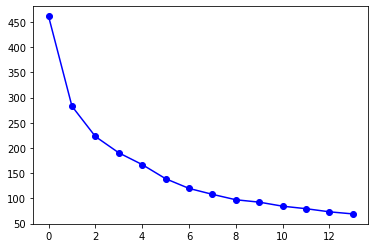

In [37]:
plt.plot(inertia, '-bo')

In [39]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(total_data_final_clust.groupby('region').mean())
total_data_final_clust['cluster'] = kmeans.labels_
total_data_final_clust.groupby('cluster').mean()

ValueError: Length of values (78) does not match length of index (1248)

In [27]:
total_data_final_clust = pd.get_dummies(total_data_final_clust , columns = ['cluster'])
total_data_final_clust

,,grp_pc_real,pop,unemp,doct10k,gini,roads,environm_real_pc,emissions_pc,electr_pc,demnagruzka,cluster_0,cluster_1
region,year,,,,,,,,,,,,
Алтайский край,2004,12.147373,14.753840,2.208274,3.799974,-0.988861,4.454347,-0.605763,-9.285780,-5.578951,-0.000508,1,0
Амурская область,2004,12.817701,13.688698,2.459589,4.096010,-1.075873,2.995732,0.240752,-9.034738,-4.928528,-0.000484,0,1
Архангельская область,2004,13.143755,14.083539,1.960095,3.964615,-1.016111,2.564949,1.154403,-8.266428,-5.109149,-0.000523,0,1
Астраханская область,2004,12.565847,13.821761,1.987874,4.189655,-0.906340,4.110874,0.661006,-9.009577,-5.583806,-0.000517,1,0
Белгородская область,2004,12.445689,14.229447,1.824549,3.668677,-1.041287,5.488938,0.758750,-9.634327,-4.850495,-0.000485,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хабаровский край,2019,13.319537,14.092049,1.335001,4.032469,-0.962335,2.522325,1.397593,-9.373550,-4.944382,-0.000532,0,1
Челябинская область,2019,13.006451,15.059971,1.360977,3.744787,-0.970219,5.481651,1.529993,-8.859462,-4.520828,-0.000539,1,0
Чувашская Республика,2019,12.536667,14.014857,1.589235,3.901973,-0.986177,6.069726,0.507388,-10.403939,-5.474905,-0.000497,1,0


In [28]:
total_data_final_clust[[ 'heart', 'cancer', 'breath','year']] = total_data_final[[ 'heart', 'cancer', 'breath','year']].values
total_data_final_clust
total_data_final_clust.to_excel('panel_data_clusters.xlsx')

In [29]:
total_data_final_clust

,,grp_pc_real,pop,unemp,doct10k,gini,roads,environm_real_pc,emissions_pc,electr_pc,demnagruzka,cluster_0,cluster_1,heart,cancer,breath,year
region,year,,,,,,,,,,,,,,,,
Алтайский край,2004,12.147373,14.753840,2.208274,3.799974,-0.988861,4.454347,-0.605763,-9.285780,-5.578951,-0.000508,1,0,3.949319,2.631889,5.794841,2004
Амурская область,2004,12.817701,13.688698,2.459589,4.096010,-1.075873,2.995732,0.240752,-9.034738,-4.928528,-0.000484,0,1,2.721295,1.88707,5.504111,2004
Архангельская область,2004,13.143755,14.083539,1.960095,3.964615,-1.016111,2.564949,1.154403,-8.266428,-5.109149,-0.000523,0,1,3.186353,2.24071,5.955837,2004
Астраханская область,2004,12.565847,13.821761,1.987874,4.189655,-0.906340,4.110874,0.661006,-9.009577,-5.583806,-0.000517,1,0,3.273364,2.282382,5.606904,2004
Белгородская область,2004,12.445689,14.229447,1.824549,3.668677,-1.041287,5.488938,0.758750,-9.634327,-4.850495,-0.000485,1,0,3.708682,2.617396,5.603225,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хабаровский край,2019,13.319537,14.092049,1.335001,4.032469,-0.962335,2.522325,1.397593,-9.373550,-4.944382,-0.000532,0,1,3.182212,2.140066,5.818598,2019
Челябинская область,2019,13.006451,15.059971,1.360977,3.744787,-0.970219,5.481651,1.529993,-8.859462,-4.520828,-0.000539,1,0,3.449988,2.517696,5.973555,2019
Чувашская Республика,2019,12.536667,14.014857,1.589235,3.901973,-0.986177,6.069726,0.507388,-10.403939,-5.474905,-0.000497,1,0,3.618993,2.541602,5.908355,2019


# Добавление новых данных

In [312]:
total_data_final.head(2)

,region,year,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,roads,workers,lab_force,environm_real_pc,emissions_pc,electr_pc,productivity,demnagruzka
0,Алтайский край,2004,51.9,13.9,328.6,12.147373,2555708.0,9.1,44.7,0.372,86.0,1181.351,1298.947,-0.605763,0.000093,0.003777,371.174237,0.999492
1,Амурская область,2004,15.2,6.6,245.7,12.817701,880899.0,11.7,60.1,0.341,20.0,376.702,426.467,0.240752,0.000119,0.007237,774.774036,0.999516


In [313]:
new_data = pd.read_excel('региональные данные 2022.xlsx')

In [314]:
new_data.head(2)

,region,reg,year,alc15,share_urban,vybrocy,population,Sq.metr_1_person,sportbuildings,sportzal,...,stadium,Potrebl_electro,pat_1_bed,pat_1_doctor,pat_1_nurse,cap_hos_10000,income,paid med,reg_exp_health,prest
0,Алтайский край,1,1990,NaN,58.08,NaN,2647109.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Алтайский край,1,1991,NaN,55.21,NaN,2659348.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
total_data_final_new = pd.merge(left = total_data_final, right = new_data, how='left',on=['region','year'])
total_data_final_new = total_data_final_new[total_data_final_new['region']!='Республика Дагестан']

In [316]:
total_data_final_new.columns.values

array(['region', 'year', 'heart', 'cancer', 'breath', 'grp_pc_real',
       'pop', 'unemp', 'doct10k', 'gini', 'roads', 'workers', 'lab_force',
       'environm_real_pc', 'emissions_pc', 'electr_pc', 'productivity',
       'demnagruzka', 'reg', 'alc15', 'share_urban', 'vybrocy',
       'population', 'Sq.metr_1_person', 'sportbuildings', 'sportzal',
       'swimpool', 'stadium', 'Potrebl_electro', 'pat_1_bed',
       'pat_1_doctor', 'pat_1_nurse', 'cap_hos_10000', 'income',
       'paid med', 'reg_exp_health', 'prest'], dtype=object)

In [317]:
total_data_final_new[total_data_final_new['year']==2006]

,region,year,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,...,stadium,Potrebl_electro,pat_1_bed,pat_1_doctor,pat_1_nurse,cap_hos_10000,income,paid med,reg_exp_health,prest
154,Алтайский край,2006,58.7,16.0,308.1,12.260373,2488267.0,8.9,47.8,0.379,...,90.0,9781.6,85.7,213.6,90.8,285.8,6256.0,NaN,5.974300e+09,3166.0
155,Амурская область,2006,19.2,7.7,326.5,12.879729,855778.0,8.2,61.9,0.343,...,23.0,6092.2,71.3,166.1,80.7,276.8,7233.0,449.0,3.646800e+09,3026.0
156,Архангельская область,2006,25.1,10.4,416.4,13.299459,1274252.0,5.8,53.7,0.369,...,13.0,14244.5,87.7,188.0,71.5,336.8,9539.0,NaN,4.720100e+09,2910.0
157,Астраханская область,2006,30.0,10.3,272.7,12.693547,1001908.0,7.0,66.6,0.416,...,9.0,3983.3,85.5,149.0,84.4,277.4,7090.0,NaN,3.461900e+09,2988.0
158,Белгородская область,2006,51.3,14.6,244.7,12.624139,1512934.0,5.6,40.7,0.374,...,48.0,13618.2,90.9,245.4,84.3,223.8,7085.0,NaN,5.383700e+09,1594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Хабаровский край,2006,16.0,9.1,255.0,13.174023,1368077.0,5.8,61.0,0.393,...,NaN,8047.1,95.7,169.5,97.8,259.5,11999.0,NaN,7.135500e+09,4565.0
227,Челябинская область,2006,20.6,9.1,148.2,12.857403,3506822.0,4.2,41.3,0.440,...,NaN,34883.2,83.5,243.4,93.4,279.3,8613.0,NaN,1.163310e+10,3098.0
228,Чувашская Республика,2006,37.2,12.1,318.4,12.400305,1273758.0,8.8,48.8,0.379,...,NaN,5396.3,92.9,208.0,85.1,299.9,5384.0,NaN,3.894800e+09,2695.0
229,Чукотский автономный округ,2006,32.5,7.4,371.7,14.088570,52652.0,3.7,77.9,0.390,...,NaN,523.9,39.8,122.5,67.2,588.9,24320.0,NaN,1.226000e+09,2156.0


In [318]:
years = total_data_final_new.year.unique()

na_df = pd.DataFrame()
na_df.index = total_data_final_new.columns.values[2:]
for year in years:
    df = total_data_final_new[total_data_final_new['year']==year]
    isna_list = []
    for variable in total_data_final_new.columns.values[2:]:
        if df[variable].isna().mean()!=0:
            isna_list.append(df[variable].isna().mean())
        else:
            isna_list.append('No')
    na_df[year] = isna_list
na_df

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
heart,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
cancer,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
breath,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
grp_pc_real,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
pop,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
unemp,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
doct10k,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
gini,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
roads,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
workers,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [319]:
total_data_final_new[total_data_final_new['year']==2007][10:20]

,region,year,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,...,stadium,Potrebl_electro,pat_1_bed,pat_1_doctor,pat_1_nurse,cap_hos_10000,income,paid med,reg_exp_health,prest
241,г. Москва,2007,15.8,8.5,318.4,14.189102,11139139.0,0.8,74.5,0.545,...,82.0,49293.6,95.9,125.7,97.6,353.5,35490.0,NaN,9.461760e+10,2206.0
242,г. Санкт-Петербург,2007,23.5,10.3,320.7,13.432574,4756207.0,2.1,79.1,0.442,...,38.0,19919.0,101.0,121.1,94.2,338.3,16876.0,NaN,4.464570e+10,2183.0
243,Еврейская автономная область,2007,15.1,6.8,256.7,12.762090,179057.0,9.3,37.8,0.368,...,6.0,1072.4,58.3,274.5,84.8,229.0,8443.0,NaN,1.271200e+09,3113.0
244,Забайкальский край,2007,24.9,8.2,237.6,12.529486,1113291.0,8.7,55.9,0.387,...,25.0,6842.6,72.7,180.2,83.5,238.4,8212.0,NaN,5.337700e+09,2944.0
245,Ивановская область,2007,28.3,13.9,371.2,12.557755,1085475.0,4.3,51.5,0.335,...,31.0,4101.4,91.0,194.1,75.2,217.0,5693.0,NaN,4.584700e+09,2306.0
246,Иркутская область,2007,27.6,9.8,333.2,12.969466,2461396.0,8.0,49.7,0.418,...,48.0,53267.4,82.5,205.5,90.8,265.5,10078.0,NaN,1.257780e+10,3793.0
247,Калининградская область,2007,16.1,9.5,291.8,12.901787,934813.0,3.4,36.6,0.383,...,8.0,3835.6,110.3,274.1,123.1,225.7,11399.0,NaN,3.317800e+09,2313.0
248,Калужская область,2007,25.8,8.8,335.3,12.737776,1018934.0,5.0,38.4,0.375,...,25.0,4326.2,90.4,257.2,98.7,256.9,9292.0,NaN,4.124700e+09,2289.0
249,Камчатский край,2007,40.1,9.6,359.1,13.429988,329378.0,9.0,54.8,0.383,...,6.0,1645.8,64.6,192.5,78.5,302.2,15962.0,NaN,2.725500e+09,2398.0
250,Карачаево-Черкесская Республика,2007,15.5,7.1,159.0,12.030491,464007.0,6.6,33.7,0.412,...,6.0,1266.8,99.6,271.7,81.3,199.1,6939.0,NaN,1.492200e+09,1309.0


In [320]:
alc15
share_urban
Sq.metr_1_person
sportbuildings / pop
sportzal / pop

pat_1_bed
pat_1_nurse
cap_hos_10000
income
prest

удалять:
    vybrocy
    population
    swimpool
    stadium
    Potrebl_electro
    pat_1_doctor
    paid med
    reg_exp_health

SyntaxError: invalid syntax (<ipython-input-320-88913e382f48>, line 13)

In [321]:
total_data_final_new = total_data_final_new[total_data_final_new['year']!=2004]
total_data_final_new['sportbuildings'] = total_data_final_new['sportbuildings']/total_data_final_new['population']

total_data_final_new['sportzal']= total_data_final_new['sportzal']/total_data_final_new['population']

'''

for variable in ['alc15','share_urban','Sq.metr_1_person', 'sportbuildings','sportzal',
                      'pat_1_bed','pat_1_nurse','cap_hos_10000','income','prest']:
    total_data_final_new[variable] = total_data_final_new[variable].apply(lambda x: np.log(x) if x>0 else 0)
    
'''

"\n\nfor variable in ['alc15','share_urban','Sq.metr_1_person', 'sportbuildings','sportzal',\n                      'pat_1_bed','pat_1_nurse','cap_hos_10000','income','prest']:\n    total_data_final_new[variable] = total_data_final_new[variable].apply(lambda x: np.log(x) if x>0 else 0)\n    \n"

In [322]:
total_data_final_new = total_data_final_new.drop(columns = [    'vybrocy',
                                        'population',
                                        'swimpool',
                                        'stadium',
                                        'Potrebl_electro',
                                        'pat_1_doctor',
                                        'paid med',
                                        'reg_exp_health'])



In [323]:
# делаем кластеры
total_data_final_new_clust = total_data_final_new.groupby('region').mean()
total_data_final_new_clust = total_data_final_new_clust[total_data_final_new_clust.columns.values[3:]]
total_data_final_new_clust

,grp_pc_real,pop,unemp,doct10k,gini,roads,workers,lab_force,environm_real_pc,emissions_pc,...,alc15,share_urban,Sq.metr_1_person,sportbuildings,sportzal,pat_1_bed,pat_1_nurse,cap_hos_10000,income,prest
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,12.399465,2.410139e+06,7.940000,45.980000,0.374400,168.372068,1109.498933,1205.660733,-0.294790,0.000085,...,7.370126,55.405529,22.183333,0.001283,0.000636,95.960000,90.860000,297.360000,14702.800000,2118.593608
Амурская область,13.023010,8.232661e+05,6.426667,59.353333,0.375733,27.820139,396.349467,423.603333,0.514085,0.000148,...,10.656278,67.019234,22.322000,0.001460,0.000684,90.166667,83.920000,290.933333,20487.116667,2385.554453
Архангельская область,13.462425,1.210802e+06,6.353333,55.006667,0.376867,19.047649,595.778400,636.029533,1.550517,0.000259,...,11.900787,76.293333,25.679333,0.000691,0.000549,98.906667,72.986667,365.613333,23245.000000,2066.897616
Астраханская область,12.961366,1.012158e+06,6.173333,64.933333,0.419933,76.455445,481.608267,524.753800,1.050706,0.000114,...,7.885453,66.800459,21.765333,0.000850,0.000518,100.320000,85.126667,277.053333,16933.283333,2133.074499
Белгородская область,13.037611,1.535744e+06,4.366667,40.680000,0.393133,484.632231,753.304400,787.503000,1.335632,0.000082,...,6.712079,66.586241,27.180000,0.002037,0.000526,122.960000,87.880000,241.820000,20424.666667,1114.231156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чувашская Республика,12.465703,1.248339e+06,6.293333,48.733333,0.380600,357.800900,609.915000,657.396333,0.414051,0.000027,...,8.864469,60.461505,24.262667,0.001775,0.000582,111.740000,87.913333,312.106667,13047.250000,1527.956442
Чукотский автономный округ,14.318824,5.097980e+04,3.960000,73.573333,0.405467,0.928899,31.502000,32.805933,2.089643,0.000451,...,10.437210,67.315555,27.596667,0.000174,0.001080,61.493333,66.426667,520.060000,49262.200000,1652.985026
Ярославская область,12.952223,1.279211e+06,5.180000,57.653333,0.379067,227.430989,648.327533,683.662333,1.374364,0.000064,...,10.752417,81.806723,24.972667,0.000849,0.000440,94.500000,93.986667,266.806667,18802.933333,1838.826003


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


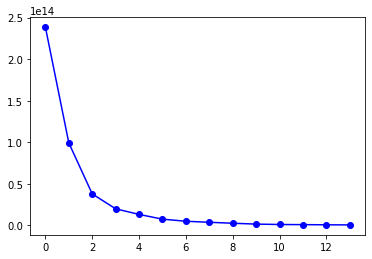

In [324]:
inertia = []
for i in np.arange(1,15,1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(total_data_final_new_clust)
    inertia.append(kmeans.inertia_)
plt.plot(pd.DataFrame(inertia)[:], '-bo')

In [325]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(total_data_final_new_clust)
#total_data_final_clust['cluster'] = kmeans.labels_
region_cluster_series = pd.DataFrame()
region_cluster_series['region'] = total_data_final_new_clust.index
region_cluster_series['cluster'] = kmeans.labels_
region_cluster_series

,region,cluster
0,Алтайский край,0
1,Амурская область,3
2,Архангельская область,3
3,Астраханская область,3
4,Белгородская область,3
...,...,...
71,Чувашская Республика,3
72,Чукотский автономный округ,3
73,Ярославская область,3
74,г. Москва,1


In [326]:
total_data_final_new = pd.merge(left = total_data_final_new, right = region_cluster_series, how='left',on='region')
total_data_final_new['year1'] = total_data_final_new['year']

In [327]:
total_data_final_new = total_data_final_new[(total_data_final_new['year']!=2005)&
                                           (total_data_final_new['year']!=2006)&
                                           (total_data_final_new['year']!=2007)&
                                            (total_data_final_new['year']!=2008)&
                                            (total_data_final_new['year']!=2009)&
                                            (total_data_final_new['year']!=2010)&
                                            (total_data_final_new['year']!=2011)&
                                            (total_data_final_new['year']!=2012)&
                                            (total_data_final_new['year']!=2013)
                                           ]

In [328]:
total_data_final_new.year

684     2014
685     2014
686     2014
687     2014
688     2014
        ... 
1135    2019
1136    2019
1137    2019
1138    2019
1139    2019
Name: year, Length: 456, dtype: object

In [329]:
total_data_final_new = pd.get_dummies(total_data_final_new,columns = ['cluster','year'])
total_data_final_new

,region,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,roads,...,cluster_0,cluster_1,cluster_2,cluster_3,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
684,Алтайский край,47.3,20.1,361.3,12.466598,2387725.0,7.2,44.9,0.379,224.000000,...,1,0,0,0,1,0,0,0,0,0
685,Амурская область,22.1,10.5,328.1,13.024814,810572.0,5.6,58.8,0.384,31.000000,...,0,0,0,1,1,0,0,0,0,0
686,Архангельская область,24.0,11.3,440.8,13.497883,1187554.0,7.2,55.8,0.371,21.000000,...,0,0,0,1,1,0,0,0,0,0
687,Астраханская область,41.5,10.6,266.8,13.098118,1018902.0,6.1,64.4,0.422,87.000000,...,0,0,0,1,1,0,0,0,0,0
688,Белгородская область,41.8,12.3,252.1,13.187582,1546022.0,4.0,40.7,0.396,675.000000,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Хабаровский край,24.1,8.5,336.5,13.319537,1318557.0,3.8,56.4,0.382,12.457523,...,0,0,0,1,0,0,0,0,0,1
1136,Челябинская область,31.5,12.4,392.9,13.006451,3471061.0,3.9,42.3,0.379,240.243006,...,1,0,0,0,0,0,0,0,0,1
1137,Чувашская Республика,37.3,12.7,368.1,12.536667,1220605.0,4.9,49.5,0.373,432.562022,...,0,0,0,1,0,0,0,0,0,1
1138,Чукотский автономный округ,22.8,13.9,624.3,14.456646,49975.0,3.8,71.0,0.408,1.187221,...,0,0,0,1,0,0,0,0,0,1


In [330]:
total_data_final_new

,region,heart,cancer,breath,grp_pc_real,pop,unemp,doct10k,gini,roads,...,cluster_0,cluster_1,cluster_2,cluster_3,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
684,Алтайский край,47.3,20.1,361.3,12.466598,2387725.0,7.2,44.9,0.379,224.000000,...,1,0,0,0,1,0,0,0,0,0
685,Амурская область,22.1,10.5,328.1,13.024814,810572.0,5.6,58.8,0.384,31.000000,...,0,0,0,1,1,0,0,0,0,0
686,Архангельская область,24.0,11.3,440.8,13.497883,1187554.0,7.2,55.8,0.371,21.000000,...,0,0,0,1,1,0,0,0,0,0
687,Астраханская область,41.5,10.6,266.8,13.098118,1018902.0,6.1,64.4,0.422,87.000000,...,0,0,0,1,1,0,0,0,0,0
688,Белгородская область,41.8,12.3,252.1,13.187582,1546022.0,4.0,40.7,0.396,675.000000,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Хабаровский край,24.1,8.5,336.5,13.319537,1318557.0,3.8,56.4,0.382,12.457523,...,0,0,0,1,0,0,0,0,0,1
1136,Челябинская область,31.5,12.4,392.9,13.006451,3471061.0,3.9,42.3,0.379,240.243006,...,1,0,0,0,0,0,0,0,0,1
1137,Чувашская Республика,37.3,12.7,368.1,12.536667,1220605.0,4.9,49.5,0.373,432.562022,...,0,0,0,1,0,0,0,0,0,1
1138,Чукотский автономный округ,22.8,13.9,624.3,14.456646,49975.0,3.8,71.0,0.408,1.187221,...,0,0,0,1,0,0,0,0,0,1


In [331]:
total_data_final_new.to_excel('data_new_variables_less_outliers.xlsx')

In [332]:
total_data_final_new.to_excel('short_panel_no_logs.xlsx')